#### **Exercise 1:**
Create a function returning the first N terms of the tailor series of the function without using the sympy series function.

In [64]:
import sympy as sp
import numpy as np
import math as m

In [32]:
x = sp.symbols("x")
f= sp.sin(x)
def fact(f,n,x0):
  return sum([sp.diff(f,x,i).subs(x,x0)*x**i/(m.factorial(i)) for i in range(0,n+1)])
%timeit fact(f,7,0)



3.86 ms ± 882 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### **Exercise 2:**

Write a matrix multiplication function using lists ("manually", using the matrix multiplication formula) and another one using numpy arrays (call matmul function). Time them both.

In [66]:
L1 = [[i*j for i in range(50)] for j in range(50)]
L2 = [[i*k for i in range(50)] for k in range(50)]
def mul1(A,B):
  if (len(A[0][:])!= len(B[:][0])):
    return print('dimension errors')
  leni= len(A[:][0])
  lenj= len(B[0][:])
  lenk= len(A[0][:])
  return [[sum([A[i][k]*B[k][j] for k in range(lenk)]) for i in range(leni)] for j in range(lenj)]
def mul2(A,B):
  C=[[0 for i in range(0,len(A[:][0]))] for j in range(0,len(B[0][:]))]
  for i in range(0,len(A[:][0])):
    for j in range(0,len(B[0][:])):
      p=0
      for k in range(0,len(A[0][:])):
       p+= A[i][k]*B[k][j]
      C[i][j]=p
  return C
%timeit mul1(L1,L2)
%timeit mul2(L1,L2)
%timeit np.matmul(L1,L2)
%timeit np.matmul(np.array(L1),np.array(L2))

13.8 ms ± 3.53 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.1 ms ± 3.26 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
395 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
399 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### **Execrise 3:**

Consider the following example. Change functions in it to plot something different from `sin` in each panel. Add x and y labels to each panel. Experiment till this looks nice enough for an article. Save the output.

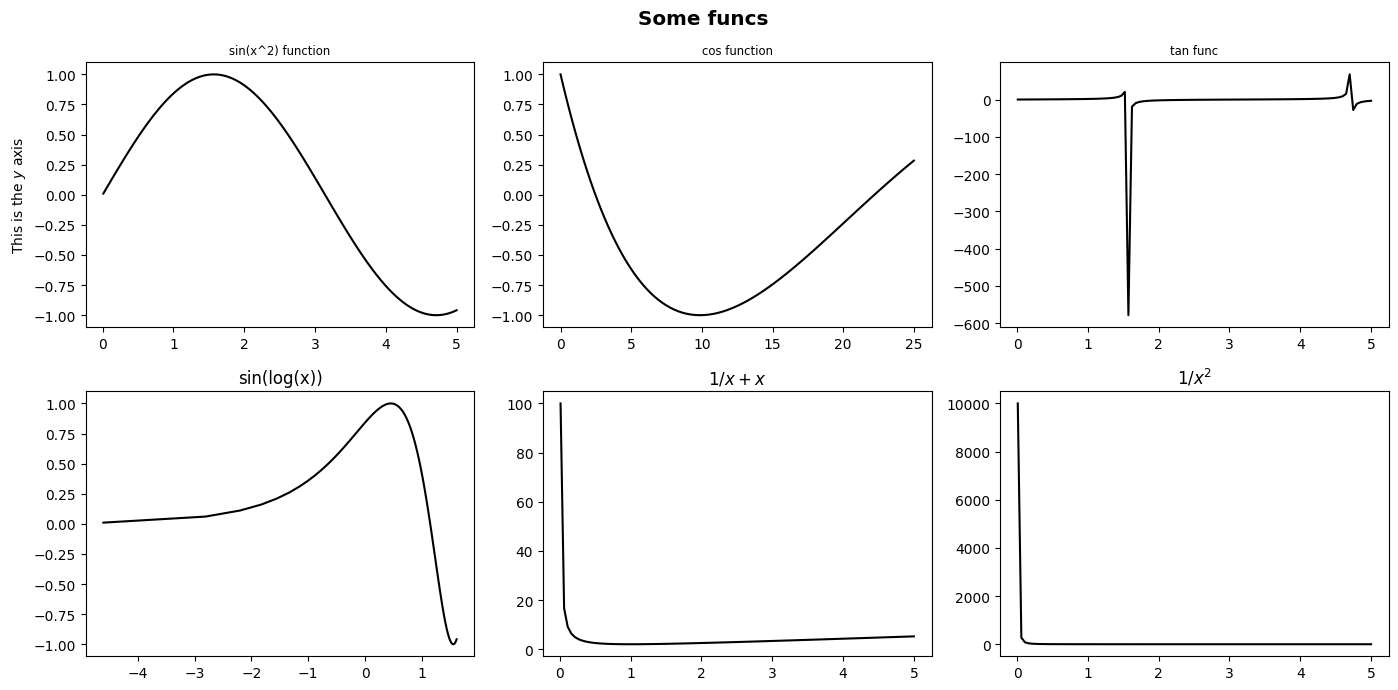

In [130]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0.01,5,100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.log(x +1)
y5 = 1/x +x
y6 = 1/x**2

# now we decide the actual figure size in inches
fig = plt.figure(figsize=(14,7))

plt.suptitle('Some funcs',fontweight='bold', fontsize='x-large')
plt.subplots_adjust(hspace=0.3, top=0.8)
# create subplots 231 means make a 2x3 grid and this is the first plot
plt.subplot(231)
#these are here to show that you can do the same here as for a single plot
plt.title('sin(x^2) function',fontsize = 'small')
plt.ylabel('This is the $y$ axis',fontsize = 'medium')
#plt.xlabel('This is the $x^2$ axis',fontsize = 'medium',fontstyle='normal')
plt.plot(x,y1,color='black')

plt.subplot(232)

plt.plot(x**2,y2,color='black')
plt.title('cos function', fontsize = 'small')
plt.subplot(233)
plt.plot(x,y3,color='black')
plt.title('tan func', fontsize = 'small')
plt.subplot(234)
plt.plot(np.log(x),y1,color='black')
plt.title('sin(log(x))')
plt.subplot(235)
plt.plot(x,y5,color='black')
plt.title('$1/x+x$')
plt.subplot(236)
plt.title('$1/x^2$')
plt.plot(x,y6,color='black')
# removed extra white space
plt.tight_layout()
#plt.show()

#### **Exercise 4:**
Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

In [179]:
a = [0]
while len(a) <= 10:
  ap = a[-1] - len(a)
  if (ap >0 and ap not in a):
    a.append(ap)
  else:
    a.append(a[-1] + len(a))

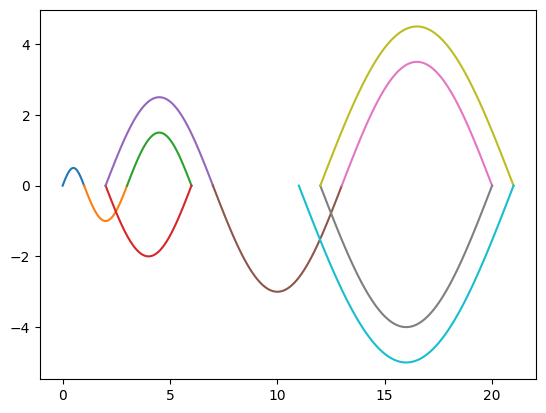

In [181]:
def curve(xi,xf,n):
  N = 100
  x = [xi + (xf-xi)/N*i for i in range(0,N+1)]
  r = np.abs(xf-xi)/2
  j = 1
  if (n%2==1):
   j=-1
  y = [j*r*np.sin(np.pi/N*i) for i in range(0,N+1)]
  return x, y
for i in range(len(a)-1):
 xp, yp = curve(a[i],a[i+1],i)
 plt.plot(xp,yp)

#### **Exercise 5:**

Plot a rainbow. Use your imagination and google to make it beautiful.

#### **Exercise 6:**

Plot a nice-looking 3-D torus. Do this 3 times with different styles.

In [118]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
print(xv[0,:])
print(yv[0,:])

[0.  0.5 1. ]
[0. 0. 0.]


In [120]:
phi = np.linspace(0,2*np.pi,100)
theta = np.linspace(0,2*np.pi,100)
theta, phi = np.meshgrid(phi,theta)
r, c = 1, 4
fig = plt.figure()
x = (r*np.sin(theta) + c)*np.cos(phi)
y = (r*np.sin(theta) + c)*np.sin(phi)
z = r*np.cos(theta)
print(z[0])
al, be, ga = 0, np.pi/2, np.pi/3
R = [[1,0,0],[0,np.cos(ga),-np.sin(ga)],[0, np.sin(ga),np.cos(ga)]]
[np.matmul(R,[x[0][i],y[i][0],z[i]]) for i in range(0,len(x[0][:]))]
ax1 = fig.add_subplot(311,projection='3d')
ax1.plot_surface(x,y,z)
plt.xlim([-5,5])
plt.ylim([-5,5])
ax1.set_zlim(-2,2)


[ 1.          0.99798668  0.99195481  0.9819287   0.9679487   0.95007112
  0.92836793  0.90292654  0.87384938  0.84125353  0.80527026  0.76604444
  0.72373404  0.67850941  0.63055267  0.58005691  0.52722547  0.47227107
  0.41541501  0.35688622  0.29692038  0.23575894  0.17364818  0.1108382
  0.04758192 -0.01586596 -0.07924996 -0.14231484 -0.20480667 -0.26647381
 -0.32706796 -0.38634513 -0.44406661 -0.5        -0.55392006 -0.60560969
 -0.65486073 -0.70147489 -0.74526445 -0.78605309 -0.82367658 -0.85798341
 -0.88883545 -0.91610846 -0.93969262 -0.95949297 -0.97542979 -0.98743889
 -0.99547192 -0.99949654 -0.99949654 -0.99547192 -0.98743889 -0.97542979
 -0.95949297 -0.93969262 -0.91610846 -0.88883545 -0.85798341 -0.82367658
 -0.78605309 -0.74526445 -0.70147489 -0.65486073 -0.60560969 -0.55392006
 -0.5        -0.44406661 -0.38634513 -0.32706796 -0.26647381 -0.20480667
 -0.14231484 -0.07924996 -0.01586596  0.04758192  0.1108382   0.17364818
  0.23575894  0.29692038  0.35688622  0.41541501  0.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

<Figure size 640x480 with 0 Axes>

#### **Exercise 7:**

Repeat the curve fitting example (from SciPy lecture) with the following modifications:

 - choose some other function
 - first write the data to a file, then read it (with numpy, for example)
 - produce the picture that has axes, name and legend


#### **Exercise 8:**

Integrate the function `x**2 + 10*np.sin(x)` on the interval `[-10,10]`.
Find a way to make a plot like in textbooks where you color the area under the curve that you integrate.
Now integrate the same function symbolically using `sympy`, then put borders into it and compare the results.